# Stochastic Ascent for Bring Home Water
This small notebook shows how to run and visualize the results of running the stochastic ascent as explained by [D. Sels](https://arxiv.org/abs/1709.08766) on the Bring Home Water problem.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sa 


## Parameters to play with
Below i have listed the parameters to play with
- T is duration to consider
- N is number of steps to do
- tweezer_grid_size is the the number of positions allowed for the controllable tweezer
- hamiltonian_grid_size: the size of the grid used to discretize the hamiltonian operator - large means more accurate but slower algorithm
- A amplitude of controllable tweezer
- B amplitude of fixed tweezer
- fix_start - fix first position of protocol to stay at -L/2
- superposition - try to move atom to superposition

We have fixed some standard value below and run the stochastic ascent algorithm that prints out what it is doing.
We have on purpose used smaller hamiltonian_grid_size compared to the experiments in the note because it speeds everything up and works well enough.
In the follwing cell we run the stochastic ascent algorithm with these parameters. 

In [2]:
T = 0.1
N = 40
tweezer_grid_size = 128
hamiltonian_grid_size = 128
A = 160
B = 130
fix_start = True
superposition = None
params = {'T': T, 'N': N, 'tweezer_grid_size': tweezer_grid_size, 'hamiltonian_grid_size': hamiltonian_grid_size, 
          'Alpha': A, 'Beta': B, 'fix_start': fix_start, 'superposition': superposition}


In [3]:
Q, best_score, protocol, path, all_fid  = sa.run(params, False, None)

Run {'T': 0.1, 'N': 40, 'tweezer_grid_size': 128, 'hamiltonian_grid_size': 128, 'Alpha': 160, 'Beta': 130, 'fix_start': True, 'superposition': None}
Time Per Step is: 0.0025
Make hamiltonians - grid size, Alpha:  128 160
Make T matrix for finite difference approximation of p^2: -1 2 -1: Tridiagonal matrix
T Scale: 0.5 / h^2 2016.1250000000002
Make B Matrix exp(-(x - start_state)^2/(2std^2)))
hamiltonians done
Made 128 Hamiltonians
Compute start state vector -  H=p^2/2m - 130 exp(-(x-x_start)^2/2\sigma).
finding smallest eigenvalue (128, 128)
largest eigenvalue 8061.952844798912
Smallest eigenvalues  -90.46769215882159
start_state norm 1.0000000000000002 complex128
Compute target state vector - H=p^2/2m-130 exp(-(x-x_end)^2/2\sigma).
finding smallest eigenvalue (128, 128)
largest eigenvalue 8061.952844798912
Smallest eigenvalues  -90.46769215882796
target_state norm 0.9999999999999999
compute unitaries by eigendecomposition of tridiagoanal matrices


/Users/jallan/github/QuantumMoves/sa.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.vdot(cvec, cvec).astype('float64')


Time to make unitaries eig 0.2880258560180664
Start Fidelity: 0.00010957117536311244
New fidelity: 0.28621 - epoch time 0.419
New fidelity: 0.37708 - epoch time 0.446
New fidelity: 0.41563 - epoch time 0.454
New fidelity: 0.44744 - epoch time 0.449
New fidelity: 0.47437 - epoch time 0.425
New fidelity: 0.48362 - epoch time 0.425
New fidelity: 0.48588 - epoch time 0.419
New fidelity: 0.48761 - epoch time 0.420
New fidelity: 0.48821 - epoch time 0.436
New fidelity: 0.48821 - epoch time 0.424
Not enough improvement - Stop this thing 0.0
total time used (s) 4.405077934265137


## Visualizing Protocol and the state of the atom
Below we show the protocol found by the algorithm above and a somewhat crude visualization of how that moves the atom.

Achieved fidelity 0.48821444576600853 in 11 iterations
The final protocol: 
[37 37 38 39 40 42 43 45 46 47 50 55 49 50 54 65 54 67 56 67 68 67 70 72
 74 75 77 79 81 82 84 85 86 87 88 88 89 89 90 28]
The cost after each iteration
[0.00010957117536311244, 0.28621069229058227, 0.3770812523897578, 0.4156284142503818, 0.44743857087170424, 0.4743705758940397, 0.48361608598105216, 0.48588086831488336, 0.4876054676234456, 0.4882144457660082, 0.4882144457660082]
actual protocol [-0.55905512  0.41732283  0.4015748   0.4015748   0.38582677  0.38582677
  0.37007874  0.35433071  0.33858268  0.32283465  0.29133858  0.27559055
  0.24409449  0.21259843  0.18110236  0.16535433  0.13385827  0.1023622
  0.05511811  0.07086614  0.05511811 -0.11811024  0.05511811 -0.1496063
  0.02362205 -0.1496063  -0.21259843 -0.22834646 -0.13385827 -0.21259843
 -0.25984252 -0.27559055 -0.29133858 -0.32283465 -0.33858268 -0.37007874
 -0.38582677 -0.4015748  -0.41732283 -0.41732283]


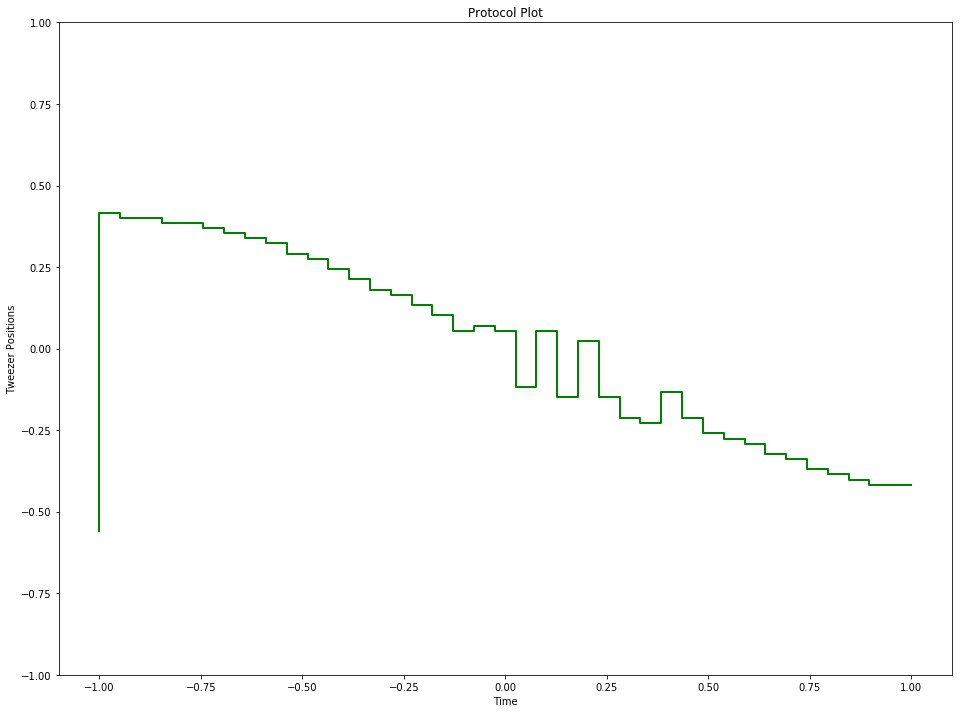

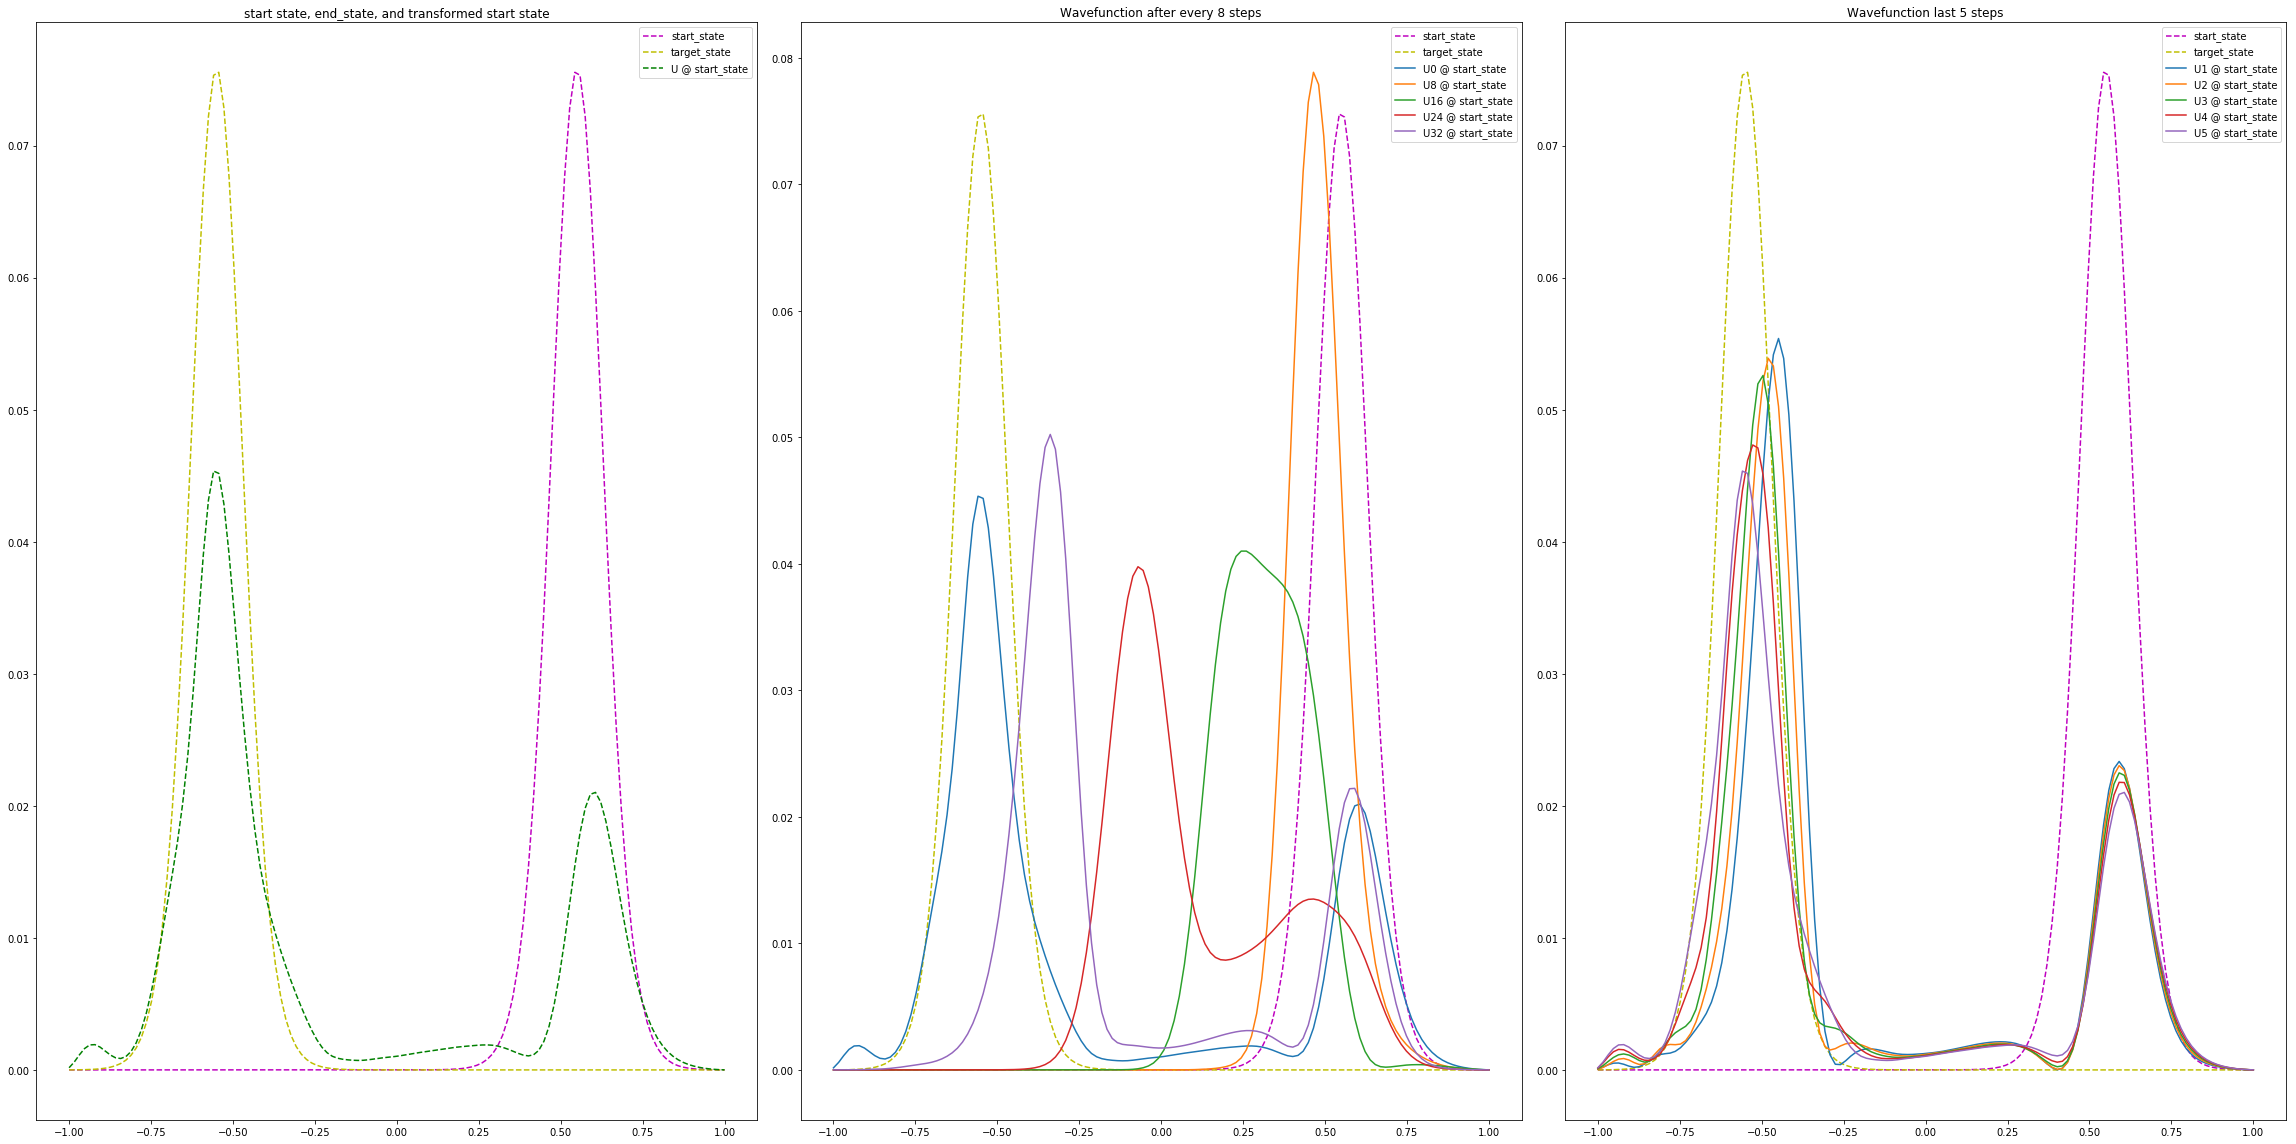

In [4]:
print('Achieved fidelity {0} in {1} iterations'.format(best_score, len(path)))
print('The final protocol: ')
print(protocol)
print('The cost after each iteration')
print(path)
fig, ax = sa.plot_protocol(Q.tweezer_spacing, protocol)
sa.visualize_fidelity(Q, protocol)
plt.show()


# Moving to  a superposition
Below we show that the algorithm can also try to move the atom to superpositions of states
And in the follwing we cell we make the same plot.
Running it several times may give very different results.

In [7]:
Q_super, fids_super, prots_super = sa.superposition(params, 1)

Run {'T': 0.1, 'N': 40, 'tweezer_grid_size': 128, 'hamiltonian_grid_size': 128, 'Alpha': 160, 'Beta': 130, 'fix_start': True, 'superposition': None}
superposition {'T': 0.1, 'N': 40, 'tweezer_grid_size': 128, 'hamiltonian_grid_size': 128, 'Alpha': 160, 'Beta': 130, 'fix_start': True, 'superposition': True}
Time Per Step is: 0.0025
Make hamiltonians - grid size, Alpha:  128 160
Make T matrix for finite difference approximation of p^2: -1 2 -1: Tridiagonal matrix
T Scale: 0.5 / h^2 2016.1250000000002
Make B Matrix exp(-(x - start_state)^2/(2std^2)))
hamiltonians done
Made 128 Hamiltonians
Compute start state vector -  H=p^2/2m - 130 exp(-(x-x_start)^2/2\sigma).
finding smallest eigenvalue (128, 128)
largest eigenvalue 8061.952844798912
Smallest eigenvalues  -90.46769215882159
start_state norm 1.0000000000000002 complex128
Compute target state vector - H=p^2/2m-130 exp(-(x-x_end)^2/2\sigma).
finding smallest eigenvalue (128, 128)
largest eigenvalue 8061.952844798912
Smallest eigenvalues  

actual protocol [-0.55905512  0.43307087  0.4015748   0.37007874  0.35433071  0.32283465
  0.29133858  0.27559055  0.25984252  0.22834646  0.73228346  0.19685039
  0.16535433  0.57480315  0.11811024  0.49606299  0.49606299  0.03937008
  0.41732283  0.41732283 -0.03937008  0.38582677 -0.1023622  -0.11811024
  0.43307087 -0.18110236  0.37007874  0.41732283 -0.25984252 -0.27559055
 -0.29133858 -0.29133858  0.43307087 -0.33858268  0.51181102 -0.37007874
 -0.38582677 -0.4015748  -0.41732283 -0.41732283]


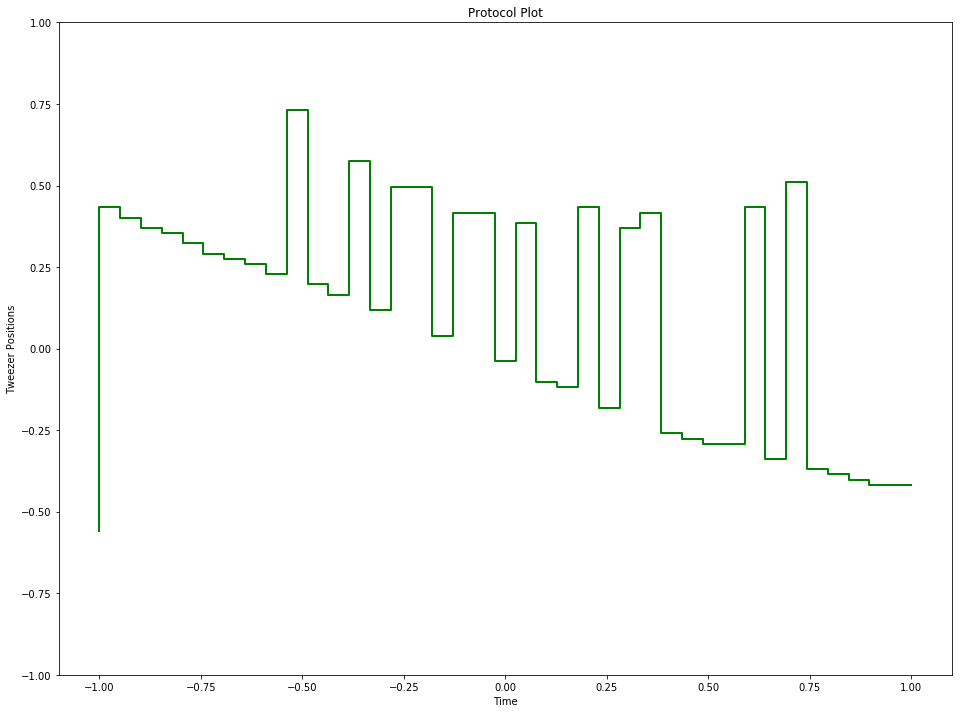

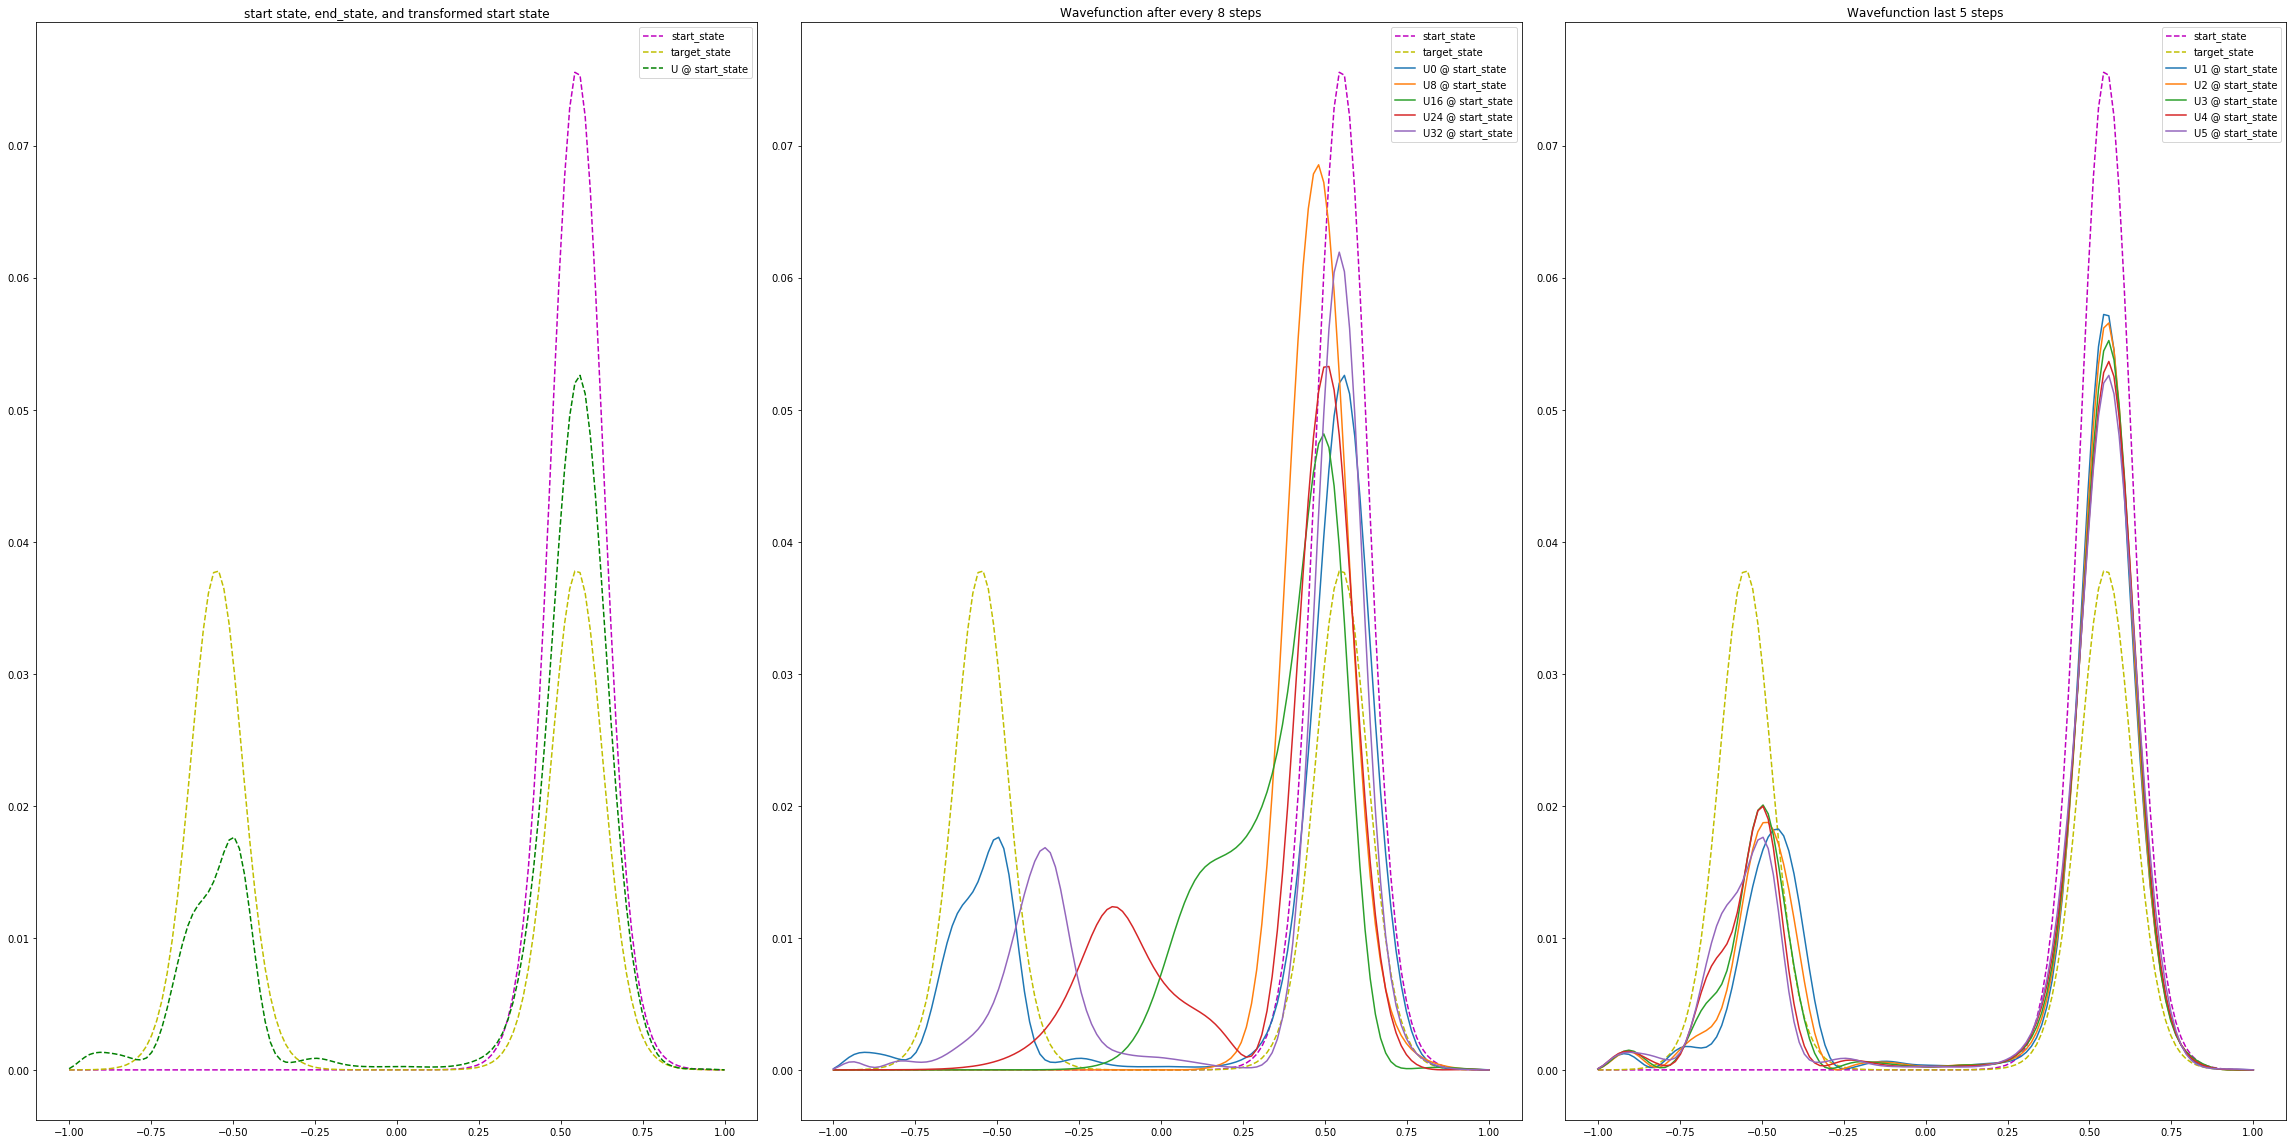

In [8]:
fig, ax = sa.plot_protocol(Q_super.tweezer_spacing, prots_super[0])
sa.visualize_fidelity(Q_super, prots_super[0])
plt.show()


## Adding more amplitudes
We can run Stochastic Ascent allowing more amplitudes if we wish. 
In this case amplitudes of 100,105, ..., 160 are allowed.
Hence the algorithm becomes slower
(Plotting the protocol does not work with plot_protocol that was made to work with the basic approach of using A=160 always)

In [9]:
Q_more, best_score_more, protocol_more  = sa.run_multi_amplitude(params, None)

Run multi amplitude {'T': 0.1, 'N': 40, 'tweezer_grid_size': 128, 'hamiltonian_grid_size': 128, 'Alpha': 160, 'Beta': 130, 'fix_start': True, 'superposition': None}
Time Per Step is: 0.0025
Make hamiltonians - grid size, Alpha:  128 160
Make T matrix for finite difference approximation of p^2: -1 2 -1: Tridiagonal matrix
T Scale: 0.5 / h^2 2016.1250000000002
Make B Matrix exp(-(x - start_state)^2/(2std^2)))
hamiltonians done
Made 128 Hamiltonians
Compute start state vector -  H=p^2/2m - 130 exp(-(x-x_start)^2/2\sigma).
finding smallest eigenvalue (128, 128)
largest eigenvalue 8061.952844798912
Smallest eigenvalues  -90.46769215882159
start_state norm 1.0000000000000002 complex128
Compute target state vector - H=p^2/2m-130 exp(-(x-x_end)^2/2\sigma).
finding smallest eigenvalue (128, 128)
largest eigenvalue 8061.952844798912
Smallest eigenvalues  -90.46769215882796
target_state norm 0.9999999999999999
compute unitaries by eigendecomposition of tridiagoanal matrices
Time to make unitaries